<a href="https://colab.research.google.com/github/Meitiann/INF2008-ML-Labs/blob/main/Week09_INF2008_Lab_2302073.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Week 09 Lab: Clustering

<style>
    table {font-size: 20px;}  /* Increases table font size */
    td {text-align: left;}     /* Ensures left alignment */
</style>

<table>
<tr><td><b>Filename</b></td> <td>`Week09 INF2008 Lab.Student.ipynb`</td></tr>
<tr><td><b>Version</b></td> <td>`1.0`</td></tr>
<tr><td><b>Description</b></td> <td>Jupyter notebook for INF2008 Lab Week 09 exercises.</td></tr>
<tr><td><b>Module</b></td> <td>INF2008</td></tr>
<tr><td><b>Prepared by</b></td> <td>Donny Soh</td></tr>
<tr><td><b>Organisation</b></td> <td>Singapore Institute of Technology</td></tr>
<tr><td><b>Division</b></td> <td>Infocomm Technology</td></tr>
<tr><td><b>Attribution</b></td> <td>Copyright &copy; 2025 Donny Soh – All Rights Reserved</td></tr>
<tr><td><b>Reference</b></td> <td>Previous INF2008 materials</td></tr>
</table>


### Learning Objectives
By completing this lab, students should be able to:

1.   Understand Clustering Concepts
*   Differentiate between centroid-based (K-Means) and density-based (DBSCAN) clustering.
*   Recognize when each method is appropriate for different types of data.

2.   Implement K-Means Clustering
*   Apply K-Means clustering to partition data based on Euclidean distances.
*   Compute cluster centroids and evaluate intra-cluster distances.

3.   Implement DBSCAN Clustering
*   Apply DBSCAN to detect density-based clusters and handle noisy data.
*   Understand the impact of ε (epsilon) and min_samples parameters.

4.   Evaluate and Compare Clustering Performance
*   Use metrics like inertia (for K-Means) and silhouette scores to assess clustering quality.
*   Visualize clustering results using Matplotlib.

5.   Preprocess Data for Clustering
*   Standardize features using StandardScaler for improved model performance.
*   Apply clustering to non-linearly separable datasets (e.g., make_moons).

In [1]:
# Import necessary packages
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans, DBSCAN
from sklearn.datasets import make_blobs, make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

To improve the visualization of the t-SNE results, we will assign distinct colors to each digit in the dataset.

We will use:
1. The tab20 colormap from Matplotlib, which provides 20 distinct colors.
2. The colors attribute of the colormap to extract an array of predefined colors.

*Student Task*: Complete the code below to generate an array of colors from the tab20 colormap.

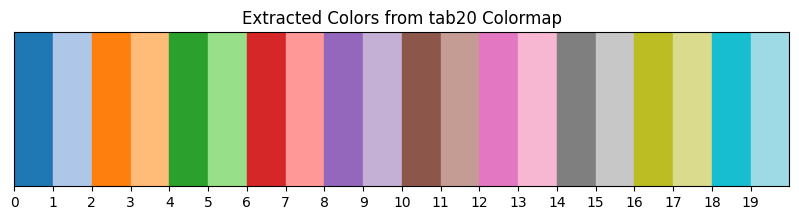

In [2]:
# TODO: Extract colors from the tab20 colormap
colours = np.array(plt.get_cmap("tab20").colors)  # <-- Fill in the correct colormap name

# TODO: Display the extracted colors
fig, ax = plt.subplots(figsize=(10, 2))

# Create a series of rectangles filled with the extracted colors
for i, color in enumerate(colours):
    ax.add_patch(plt.Rectangle((i, 0), 1, 1, color=color))  # <-- Fill in the correct variable

ax.set_xlim(0, len(colours))  # <-- Fill in the correct variable
ax.set_ylim(0, 1)
ax.set_xticks(range(len(colours)))  # <-- Fill in the correct variable
ax.set_yticks([])
ax.set_title("Extracted Colors from tab20 Colormap")

plt.show()

### 9.1 Centroid Based Clustering: K-Means Clustering

We use the average euclidean distance based measure between the points and the centroids.

In [3]:
def k_mean_distance(data, centroids, cluster_labels):
  full_distances = []
  for i_centroid in range(0, max(cluster_labels) + 1):
    cx = centroids[i_centroid, 0]
    cy = centroids[i_centroid, 1]
    distances = [np.sqrt((x-cx)**2+(y-cy)**2) for (x, y) in data[cluster_labels == i_centroid]]
    full_distances.extend(distances)
  return np.mean(full_distances)

We will generate a synthetic dataset using the `make_blobs` function. This dataset consists of multiple clusters, making it useful for testing clustering algorithms.

To configure `make_blobs`:
1. Set `n_samples=100` to generate 100 data points.
2. Set `centers=5` to create five distinct clusters.
3. Set `cluster_std=2` to control the spread of each cluster.
4. Set `n_features=2` to generate two-dimensional data.
5. Use `random_state=20` to ensure reproducibility.

*Student Task*: Complete the code below to generate a synthetic dataset with five clusters.

In [4]:
# TODO: Generate a synthetic dataset with five clusters
X, y = make_blobs(n_samples=100, centers=5, cluster_std=2, n_features=2, random_state=20)  # <-- Fill in the correct values

We will visualize the synthetic dataset generated using `make_blobs`. This scatter plot will help us see how the clusters are distributed in a two-dimensional space.

To create the plot:
1. The first column of `X` represents the x-coordinates.
2. The second column of `X` represents the y-coordinates.
3. The `c` parameter assigns colors to each cluster based on `y`.
4. The `s=40` parameter controls the size of the points.

*Student Task*: Complete the code below to plot the dataset with colors representing different clusters.

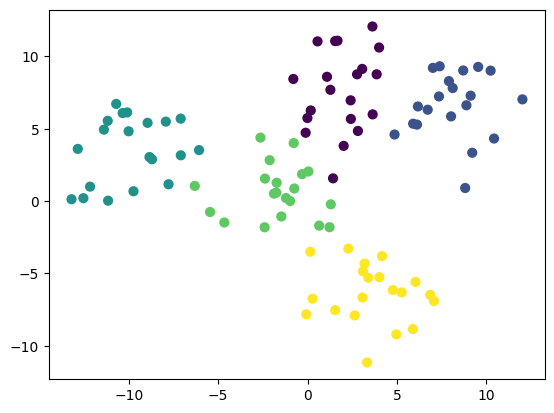

In [5]:
# TODO: Create a scatter plot of the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, s=40)  # <-- Fill in the correct indices and labels

# TODO: Display the plot
plt.show()

Since the feature values in our dataset may have different ranges, it is good practice to do scaling before running the kmeans algorithm.

Standardization ensures:
1. The mean of each feature is **0**.
2. The standard deviation of each feature is **1**.
3. The dataset is not biased towards features with larger numerical ranges.

To do this, we use `StandardScaler()`:
- `fit(X)`: Computes the mean and standard deviation of `X`.
- `transform(X)`: Applies standardization to `X`.

*Student Task*: Complete the code below to standardize the dataset.


In [6]:
# TODO: Fit the StandardScaler to the dataset
scaler = StandardScaler().fit(X)  # <-- Fill in the correct method and dataset

# TODO: Transform the dataset using the fitted scaler
X_std = scaler.transform(X)  # <-- Fill in the correct method and dataset

We will apply **K-Means clustering** to the standardized dataset. K-Means is an unsupervised learning algorithm that groups data points into clusters based on similarity.

To configure K-Means:
1. `n_clusters=3` sets the number of clusters to 3.
2. `random_state=0` ensures reproducibility.
3. `n_init='auto'` automatically selects the number of initializations.

The `fit(X_std)` function applies K-Means to the standardized dataset.

*Student Task*: Complete the code below to fit a K-Means model with 3 clusters.

In [7]:
# TODO: Apply K-Means clustering to the standardized dataset
kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(X_std)  # <-- Fill in the correct values and methods

After fitting the K-Means model, we can retrieve the **centroids** of the clusters. The centroid of a cluster is the **mean position** of all the points assigned to that cluster.

*   kmeans.cluster_centers_: Stores the coordinates of the cluster centers after fitting the model.
*   centroids = kmeans.cluster_centers_: Assigns the centroids to the variable centroids.
*   centroids: Displays the centroid values.

Each row in centroids represents the center of a cluster in the feature space.

*Student Task*: Complete the code below to extract and display the cluster centroids.


In [8]:
# TODO: Retrieve the centroids of the clusters
centroids = kmeans.cluster_centers_  # <-- Fill in the correct attribute

# TODO: Display the centroids
print(centroids)  # <-- Fill in the correct variable

[[-1.06849344 -0.01286471]
 [ 0.72777309  0.86069225]
 [ 0.45318842 -1.47616069]]


Retrieves the cluster labels assigned by the trained K-Means model for each data point and displays them.


* kmeans.labels_: Stores the cluster assignments for each data point in X_std.
* y_pred = kmeans.labels_: Assigns these labels to y_pred.
* y_pred: Displays the predicted cluster labels.

Each value in y_pred represents the cluster (0, 1, or 2 in this case) to which a data point has been assigned.

*Student Task*: Complete the code below to extract and display the cluster assignments.


In [9]:
# TODO: Retrieve the predicted cluster labels
y_pred = kmeans.labels_  # <-- Fill in the correct attribute

# TODO: Display the cluster assignments
print(y_pred)  # <-- Fill in the correct variable

[1 1 2 1 0 1 0 2 0 0 1 0 1 2 1 2 2 2 2 0 0 2 1 2 1 1 2 0 2 0 2 1 0 1 1 0 1
 0 1 1 1 2 0 0 0 1 1 0 2 0 1 0 1 0 0 1 2 1 1 1 0 2 2 0 1 2 0 1 2 1 0 1 0 1
 0 2 0 1 1 0 1 0 1 0 2 0 1 1 2 1 0 1 0 0 0 1 0 1 2 0]


This code visualizes the K-Means clusters and their centroids.

* Create the figure → Sets up a 3.5x3.5 plot.
* Plot data points → Uses plt.scatter to display X_std, colored by their assigned clusters (y_pred).
* Mark centroids → Plots cluster centers as large "X" markers.
* Set aspect ratio → Ensures equal scaling for x and y axes.
* Show the plot → plt.show() renders the visualization.

The exact steps are:
1. Use a scatter plot to display the clustered data.
2. Assign colors to each cluster using `colours[y_pred]`.
3. Overlay the **cluster centroids** using a larger marker (`x`) for visibility.
4. Ensure equal aspect ratio to maintain correct data proportions.

*Student Task*: Complete the code below to visualize the clusters and their centroids.


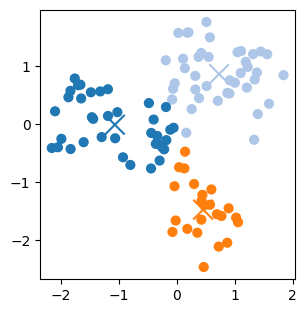

In [10]:
# TODO: Create a figure and axis handle
fig = plt.figure(figsize=(3.5, 3.5))
ax = plt.gca()

# TODO: Plot the clustered data
plt.scatter(X_std[:, 0], X_std[:, 1], c=colours[y_pred], s=40)  # <-- Fill in the correct variable for colors and labels

# TODO: Plot the cluster centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c=colours[np.unique(y_pred)], s=200, marker="x")  # <-- Fill in the correct variables

# TODO: Ensure equal aspect ratio
ax.set_aspect('equal')

# TODO: Display the plot
plt.show()


Valuates K-Means clustering by varying the number of clusters and comparing performance on training vs. validation data.

Why split into train and validation sets?
* Training data (X_train): Used to fit the K-Means model.
* Validation data (X_valid): Ensures clusters generalize to unseen data, preventing overfitting.

Why test different cluster numbers?
* The loop trains K-Means with clusters from 1 to 20.
* Loss (distance to centroids) is calculated for both sets to find the optimal cluster count.

Why plot train vs. validation loss?
* If both decrease → More clusters improve structure.
* If validation loss plateaus or rises → Risk of overfitting.
* Helps select the elbow point, balancing model complexity and generalization.

Steps involved:
1. **Split the dataset** into training and validation sets.
2. Iterate over different values of `k` (number of clusters).
3. **Train a K-Means model** for each value of `k`.
4. Compute and store the **training loss** and **validation loss**.
5. Plot the losses to find the optimal `k`.

*Student Task*: Complete the code below to train K-Means with varying numbers of clusters and visualize the loss curve.


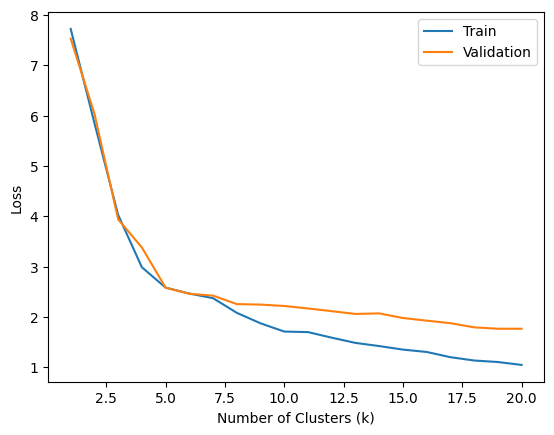

In [11]:
# TODO: Import train_test_split from scikit-learn
from sklearn.model_selection import train_test_split

# TODO: Split the dataset into training and validation sets
X_train, X_valid, _, _ = train_test_split(X, y, test_size=0.3, random_state=0)  # <-- Fill in the correct values

# Initialize lists to store loss values
loss_train, loss_valid = [], []
max_cluster = 20  # Maximum number of clusters to test

# TODO: Iterate over different values of k (number of clusters)
for k in np.arange(max_cluster) + 1:
    # TODO: Train K-Means with k clusters
    kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(X_train)  # <-- Fill in the correct values

    # Retrieve cluster centroids and predict cluster labels
    centroids = kmeans.cluster_centers_
    cluster_labels = kmeans.predict(X_train)

    # TODO: Compute and store training loss
    loss_train.append(k_mean_distance(X_train, centroids, cluster_labels))  # <-- Fill in the correct function parameters

    # TODO: Compute and store validation loss
    cluster_labels = kmeans.predict(X_valid)
    loss_valid.append(k_mean_distance(X_valid, centroids, cluster_labels))  # <-- Fill in the correct function parameters

# TODO: Plot the loss curves for training and validation
plt.plot(np.arange(max_cluster) + 1, loss_train, label='Train')
plt.plot(np.arange(max_cluster) + 1, loss_valid, label='Validation')

# TODO: Label the axes
plt.xlabel('Number of Clusters (k)')  # <-- Fill in the correct label
plt.ylabel('Loss')

# TODO: Add a legend
plt.legend(loc='upper right')

# Display the plot
plt.show()

If we use the recommended clusters = 10, we get the following plot.

Steps involved:
1. Train K-Means with `n_clusters=10` on the standardized dataset.
2. Retrieve the **centroids** of the clusters.
3. Get the **cluster labels** assigned to each data point.
4. Plot the clustered data points using different colors.
5. Overlay the **cluster centers** to visualize their locations.

*Student Task*: Complete the code below to train K-Means with 10 clusters and visualize the clustering results.


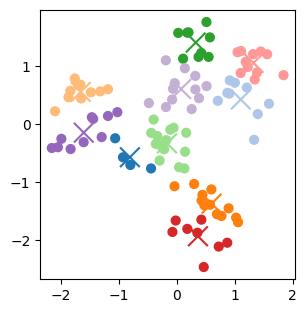

In [14]:
# TODO: Train K-Means with 10 clusters
kmeans = KMeans(n_clusters=10, random_state=0, n_init="auto").fit(X_std)  # <-- Fill in the correct values

# TODO: Retrieve the cluster centroids
centroids = kmeans.cluster_centers_  # <-- Fill in the correct attribute

# TODO: Get the predicted cluster labels
y_pred = kmeans.labels_  # <-- Fill in the correct attribute

# TODO: Create a figure and axis handle
fig = plt.figure(figsize=(3.5, 3.5))
ax = plt.gca()

# TODO: Plot the clustered data points
plt.scatter(X_std[:, 0], X_std[:, 1], c=colours[y_pred], s=40)  # <-- Fill in the correct color mapping

# TODO: Plot the cluster center locations
plt.scatter(centroids[:, 0], centroids[:, 1], c=colours[np.unique(y_pred)], s=200, marker="x")  # <-- Fill in the correct values

# TODO: Ensure equal aspect ratio
ax.set_aspect('equal')

# Display the plot
plt.show()

### 9.2 Issue with K-Means Clustering

We will generate a synthetic dataset using the `make_moons` function. This dataset consists of two interleaving half-circle shapes, making it useful for testing clustering algorithms on non-linearly separable data.

To process the dataset:
1. Generate 150 data points with `make_moons`.
2. Add some noise (`noise=0.05`) to make the dataset more realistic.
3. Standardize the dataset using `StandardScaler` to ensure each feature has a mean of 0 and a standard deviation of 1.

*Student Task*: Complete the code below to generate and standardize the dataset.


In [15]:
# TODO: Generate a synthetic dataset using make_moons
X, y = make_moons(n_samples=150, noise=0.05, random_state=0)  # <-- Fill in the correct values

# TODO: Fit the StandardScaler to the dataset
scaler = StandardScaler().fit(X)  # <-- Fill in the correct method and dataset

# TODO: Transform the dataset using the fitted scaler
X_std = scaler.transform(X)  # <-- Fill in the correct method and dataset


Now that we have generated and standardized the **moon-shaped dataset**, we will visualize the data points.

To do this:
1. Create a scatter plot of the standardized dataset.
2. Use `c=colours[y]` to color the points based on their labels.
3. Ensure the figure size is set to `(3.5, 3.5)` for clarity.

*Student Task*: Complete the code below to plot the dataset.


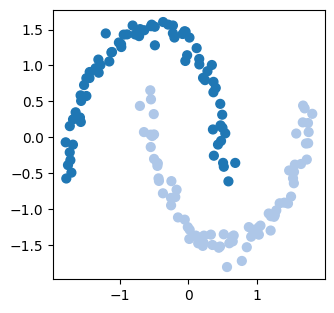

In [16]:
# TODO: Create a figure and grab the axis handle
fig = plt.figure(figsize=(3.5, 3.5))
ax = plt.gca()

# TODO: Plot the dataset with color-coded labels
plt.scatter(X_std[:, 0], X_std[:, 1], c=colours[y], s=40)  # <-- Fill in the correct variables

# TODO: Display the plot
plt.show()

We will now apply **K-Means clustering** with 2 clusters to the moon-shaped dataset and visualize the results.

To do this:
1. Train K-Means with `n_clusters=2` on the standardized dataset.
2. Retrieve the **centroids** of the clusters.
3. Get the **cluster labels** assigned to each data point.
4. Plot the clustered data points using different colors.
5. Overlay the **cluster centers** using a larger marker (`x`) for visibility.

*Student Task*: Complete the code below to train K-Means with 2 clusters and visualize the clustering results.


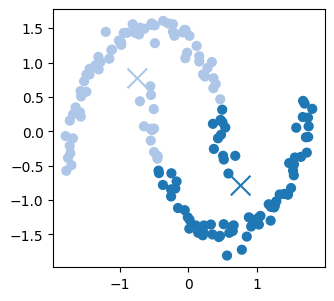

In [17]:
# TODO: Train K-Means with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X_std)  # <-- Fill in the correct values

# TODO: Retrieve the cluster centroids
centroids = kmeans.cluster_centers_  # <-- Fill in the correct attribute

# TODO: Get the predicted cluster labels
y_pred = kmeans.labels_  # <-- Fill in the correct attribute

# TODO: Create a figure and grab the axis handle
fig = plt.figure(figsize=(3.5, 3.5))
ax = plt.gca()

# TODO: Plot the clustered data points
plt.scatter(X_std[:, 0], X_std[:, 1], c=colours[y_pred], s=40)  # <-- Fill in the correct color mapping

# TODO: Plot the cluster center locations
plt.scatter(centroids[:, 0], centroids[:, 1], c=colours[np.unique(y_pred)], s=200, marker="x")  # <-- Fill in the correct values

# TODO: Ensure equal aspect ratio
ax.set_aspect('equal')

# TODO: Display the plot
plt.show()


### 9.2 Distance based clustering: DBScan

In [18]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics

We will now apply **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)** to the dataset. Unlike K-Means, DBSCAN can identify clusters of arbitrary shape and detect noise points.

To configure DBSCAN:
1. `eps=0.3` defines the neighborhood radius for grouping points.
2. `min_samples=5` sets the minimum number of points required to form a dense region.
3. `fit(X)` applies DBSCAN to the dataset.

After fitting the model, we will:
1. Retrieve the **cluster labels** for each data point.
2. Compute the **number of clusters**, ignoring noise points.
3. Compute the **number of noise points** (assigned label `-1`).

*Student Task*: Complete the code below to apply DBSCAN and compute the estimated number of clusters and noise points.


In [20]:
# TODO: Apply DBSCAN clustering
db = DBSCAN(eps=0.3, min_samples=5).fit(X_std)  # <-- Fill in the correct values

# TODO: Retrieve the predicted cluster labels
y_pred = db.labels_  # <-- Fill in the correct attribute

# TODO: Compute the number of clusters (excluding noise)
n_clusters_ = len(set(y_pred)) - (1 if -1 in y_pred else 0)  # <-- Fill in the correct variable

# TODO: Compute the number of noise points
n_noise_ = list(y_pred).count(-1)  # <-- Fill in the correct variable

# TODO: Print the results
print("Estimated number of clusters: %d" %n_clusters_)  # <-- Fill in the correct variable
print("Estimated number of noise points: %d" %n_noise_)  # <-- Fill in the correct variable


Estimated number of clusters: 2
Estimated number of noise points: 1


Now that we have applied **DBSCAN clustering**, we will visualize the clustering results.

To do this:
1. Create a scatter plot of the **DBSCAN-clustered data**.
2. Use `c=colours[y_pred]` to color the points based on their assigned clusters.
3. Ensure the figure size is `(3.5, 3.5)` for clarity.

Unlike K-Means, **DBSCAN can detect noise points**, which will be labeled as `-1` and may appear as a separate color in the visualization.

*Student Task*: Complete the code below to plot the DBSCAN clustering results.


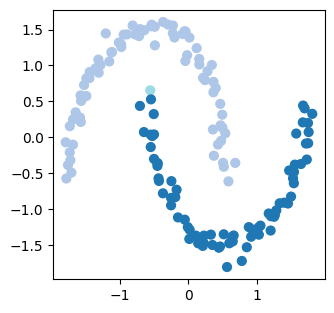

In [21]:
# TODO: Create a figure and grab the axis handle
fig = plt.figure(figsize=(3.5, 3.5))
ax = plt.gca()

# TODO: Plot the dataset with color-coded cluster labels
plt.scatter(X_std[:, 0], X_std[:, 1], c=colours[y_pred], s=40)  # <-- Fill in the correct variables

# TODO: Display the plot
plt.show()


Explore what happens when you change the eps and the min_samples.

### Summary

This lab introduced K-Means and DBSCAN, two fundamental clustering algorithms. We first explored K-Means, which partitions data into clusters based on centroids and is well-suited for spherical clusters. We then applied DBSCAN, which identifies clusters based on density, making it effective for complex shapes and handling outliers. Throughout the lab, we visualized cluster assignments and evaluated model performance using appropriate metrics. By the end, students should have a solid understanding of how and when to apply clustering techniques in machine learning.